# Vehicles data analysis

data visulaisation and analysis project on large vehicle data set
the purpose of this project is to show the relationship various variables and how they interact with eachother and show that in a visual and an interactive way that is hoted on a public server

In [1]:
import pandas as pd
import numpy as np

from scipy import stats as st 
from scipy.stats import pearsonr

from matplotlib import pyplot as plt


In [2]:
vehicles = pd.read_csv('vehicles_us.csv')


Data is a comma seperated value document > no arguments were passed in order for pandas to read data into the dataframe

# Cleaning data 

In [3]:
# create new column based on model code to pull info about the manufacturer
vehicles['manufacturer'] = vehicles['model'].apply(lambda x: x.split()[0])

In [5]:
# check for any missing values 
cols = vehicles.columns

null_values = []

for col in cols:
    null_values.append(vehicles[vehicles[col].isna()].shape[0])
    

null_count = dict(zip(cols, null_values))




model_year and cylinders can be replaced with big numbers so its clear when trying to do data analysis these numbers arent revelant, 

is_4wd can be set to 0 > meaning not 4wd 

paint_color > unknown 


In [6]:
# replacing missing values 
# replace with large number to highlight unimportance and to have it easily be cut as an outlier
vehicles['model_year'].fillna(9999, inplace = True)

# turns column into binary answers which are easy to read 
vehicles['is_4wd'].fillna(0, inplace = True)

# paint colour is qualitative so cant be derived from an average meaningfully
vehicles['paint_color'].fillna('Unknown', inplace = True)



# Fill nan cylinders with the mean of their corosponding mean depentant on the model of the vehicle 
# get a list of all the vehicles that have missing cylinder values associated 
nanc_models: list = vehicles[vehicles['cylinders'].isna()]['model'].unique()
#get a dictionary of each model and thier average number of cylinders (rounded as an int)     
nanc_cyldinders: dict = dict(vehicles[vehicles['model'].isin(nanc_models)].groupby('model')['cylinders'].mean().__round__())  #get a dictionary of each model and thier average number of cylinders (rounded as an int)
# map the corisponding values onto the nan values
vehicles['cylinders'] = vehicles['cylinders'].fillna(vehicles['model'].map(nanc_cyldinders))



# Fill nan odometer with the mean of their models 
nano_models: list = vehicles[vehicles['odometer'].isna()]['model'].unique()
nano_odometer: dict = dict(vehicles[vehicles['model'].isin(nano_models)].groupby('model')['odometer'].mean())
vehicles['odometer'] = vehicles['odometer'].fillna(vehicles['model'].map(nano_odometer))
vehicles['odometer'] = vehicles['odometer'].fillna(vehicles['odometer'].mean()) #mercedes-benz benze sprinter 2500 has no infomation on mileage so wasnt mapped




In [7]:
# fix data types
# to_datetime values, floating point to int in order to save memory, bool values for clarity 

vehicles['model_year'] = vehicles['model_year'].astype(int)
vehicles['cylinders'] = vehicles['cylinders'].astype(int)
vehicles['date_posted'] = pd.to_datetime(vehicles['date_posted'])
vehicles['is_4wd'].replace({1.0: True, 0.0: False}, inplace= True)

In [8]:
#check duplicates 

vehicles[vehicles.duplicated()]    # returns empty df > no duplicates 

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,manufacturer


In [9]:
# exporting the now cleaned dataframe into the respository to be used with the main.py file 
vehicles.to_csv('vehicles_clean.csv', index = False, encoding = 'utf-8')

data has been cleaned and exported into the enviroment for use in the main python document,

overall concluions show a relatively clean data set, minor wuality of life changes had to be made so some data types in order to improve usability. similarly, NaN values had to be filled, NaN values weren't hugely common and were replaced by their relative means where possible so should effect the outcome of further analysis and visulaisation too greatly 

# Data Analysis

average price for car,
car price for each manufacturer 

is there a statistical corrolation between the miles of the car and its price? 

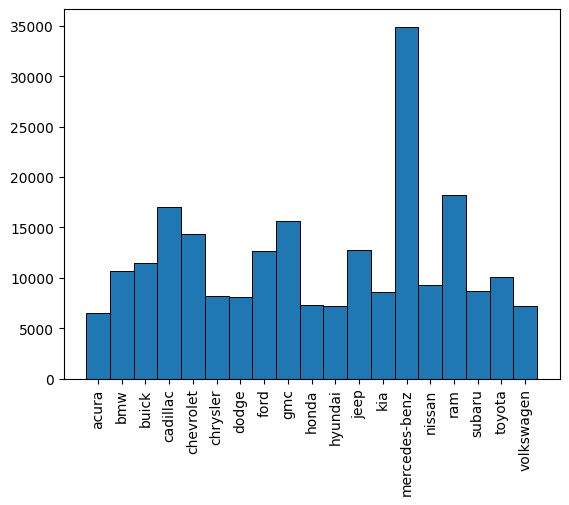

In [10]:
# create new df object that contains the manufacturer and the price of the car, group by manufacturer
average_df = vehicles[['manufacturer', 'price']].groupby('manufacturer').mean().reset_index()
#static graph to interpret data from 

fig, ax = plt.subplots()

ax.bar(average_df['manufacturer'], average_df['price'],
        width=1, linewidth=0.7,
        edgecolor="black",
        )
ax.tick_params(axis='x', labelrotation=90)

plt.show()

From this graph we can see that on average mercedes-benz have the most valueble cars on average by a significant amount, more analysis would need to be conducted to draw out reasons to why this is the case. analysis such as whether it produces more of a certain type of car than other brands or if theres a statitically higher amount of cars in good condition with low miles within the sample set. 

In [11]:
odo: list = vehicles['odometer'].to_numpy()
price: list = vehicles['price'].to_numpy()

pearsonr(price, odo)


PearsonRResult(statistic=-0.38408676469270364, pvalue=0.0)

correlation is equal to -0.4 which suggests a relatively weak negative correlation between price and the number of miles a car has done, this is to be expected as the older and more used a car is the less valueable the car would be. similarly the reason why this is only a weak correlation would be to suggesst that different vehicles retain their value differently; some may be able to withstand higher mileage and not decrease their price as much.

the p-value of this test came out to 0, this still suggests statistical significance as it is less than 0.5, p-values in scipy are calculated analytically meaning an exact value cannot be found if it is lower than a certain very small number which highlights this tests significance.
(it is also important to note that the magnitude of samples helped to reduce this p-value)

# EDA Conclusion 

This project has highlighted some intresting things through the data such as the stark difference in prices between different types and different companies/ brands as well as the corrolation between the mileage of the car and its price. this corrolation came out relatively weak but general consecious would lead you to believe that the corrolation between the 2 variables to be a stronger negative. The visulaisation in the main.py file shows the weakness better. 